In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression

In [35]:
data = pd.read_csv('Combined_News_DJIA.csv')
# data.head()

In [36]:
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']
# test.head()

In [15]:
example = train.iloc[3,10]
example2 = example.lower()

In [16]:
example3 = CountVectorizer().build_tokenizer()(example2)
print(example3)

['the', 'commander', 'of', 'navy', 'air', 'reconnaissance', 'squadron', 'that', 'provides', 'the', 'president', 'and', 'the', 'defense', 'secretary', 'the', 'airborne', 'ability', 'to', 'command', 'the', 'nation', 'nuclear', 'weapons', 'has', 'been', 'relieved', 'of', 'duty']


In [37]:
pd.DataFrame([[x,example3.count(x)] for x in set(example3)], columns = ['Word', 'Count'])

NameError: name 'example3' is not defined

In [38]:
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))

In [39]:
basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(trainheadlines)
print(basictrain.shape)

(1611, 31675)


In [52]:
basicmodel = LogisticRegression(penalty = 'l1',C = 0.3 )
basicmodel = basicmodel.fit(basictrain, train["Label"])

In [41]:
from sklearn.naive_bayes import BernoulliNB
basicmodel = BernoulliNB()
temp = train["Label"]
# print(temp)
basicmodel = basicmodel.fit(basictrain, train["Label"])

In [42]:
from sklearn.tree import DecisionTreeClassifier
basicmodel = DecisionTreeClassifier()
basicmodel = basicmodel.fit(basictrain,temp)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
basicmodel = GradientBoostingClassifier()
basicmodel = basicmodel.fit(basictrain,temp)

In [53]:
djia = pd.read_csv('DJIA_table.csv')
djia_test = djia[djia['Date'] > '2014-12-31']
djia_train = djia[djia['Date'] < '2015-01-01' ]
djia_train.head()

,Date,Open,High,Low,Close,Volume,Adj Close
378,2014-12-31,17987.660156,18043.220703,17820.880859,17823.070312,82840000,17823.070312
379,2014-12-30,18035.019531,18035.019531,17959.699219,17983.070312,47490000,17983.070312
380,2014-12-29,18046.580078,18073.039062,18021.570312,18038.230469,53870000,18038.230469
381,2014-12-26,18038.300781,18103.449219,18038.300781,18053.710938,52570000,18053.710938
382,2014-12-24,18035.730469,18086.240234,18027.779297,18030.210938,42870000,18030.210938


In [40]:
basicmodel = LinearRegression()
basicmodel = basicmodel.fit(basictrain, djia_train["Close"])

In [54]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
predictions = basicmodel.predict(basictest)

In [46]:
# print(predictions)

In [55]:
pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,75,111
1,78,114


In [37]:
x = djia_test['Date']
y = djia_test['Close']

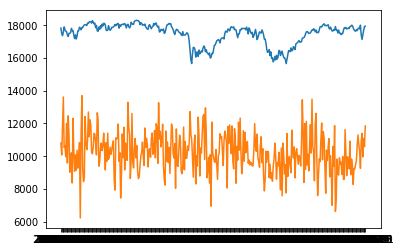

In [39]:
plt.plot(x,y)
plt.plot(x,predictions)
plt.show()